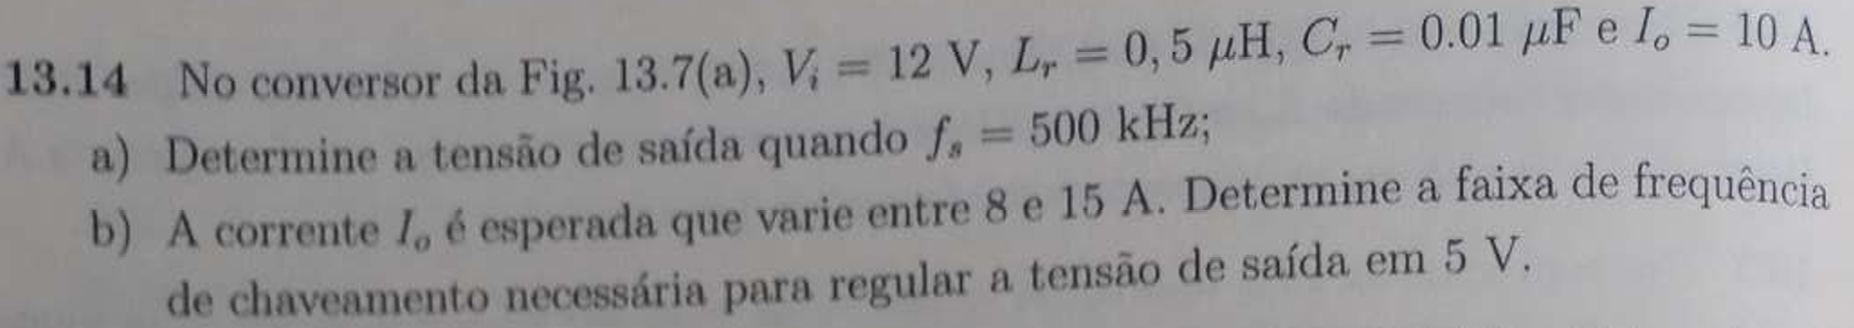

In [3]:
import numpy as np

In [4]:
# Parametros do circuito

Vi = 12
Lr = 0.5e-6
Cr = 0.01e-6
Io = 10
Fs = 500e3
Wn = 1 / np.sqrt(Lr * Cr)
Zn = np.sqrt(Lr / Cr)

In [5]:
# Tempos chave ZVS

def t1(vi, cr, io):
    return vi * cr / io

def t2(wn, vi, io, zn, t1):
    return (1/wn) * (np.arcsin(vi/(io*zn)) + np.pi) + t1

def t3(lr, io, vi, wn, t1, t2):
    return (lr*io/vi) * (1 - np.cos(wn*(t2-t1))) + t2

In [20]:
t_1 = t1(Vi, Cr, Io)
t_2 = t2(Wn, Vi, Io, Zn, t_1)
t_3 = t3(Lr, Io, Vi, Wn, t_1, t_2)
print(f'tempos de cada estágio: \nt1 = {t_1*1e9:.3f}ns \nt2 = {t_2*1e9:.3f}ns \nt3 = {t_3*1e9:.3f}ns')
print(f'a) Vo = {Vi*(1 - Fs*(t_3 - t_1/2)):.3f}')

Io_array = np.array([8, 15])
Vo = 5
for i in Io_array:
    print('\n' + '*'*100)
    print(f'b) Io = {i}A:')
    t_1 = t1(Vi, Cr, i)
    t_2 = t2(Wn, Vi, i, Zn, t_1)
    t_3 = t3(Lr, i, Vi, Wn, t_1, t_2)
    print(f'tempos de cada estágio: \nt1 = {t_1*1e9:.3f}ns \nt2 = {t_2*1e9:.3f}ns \nt3 = {t_3*1e9:.3f}ns')
    print(f'fs = {( (Vo - Vi) / (Vi*(t_1/2 - t_3)) )*1e-3:.3f}kHz')

tempos de cada estágio: 
t1 = 12.000ns 
t2 = 246.203ns 
t3 = 1073.492ns
a) Vo = 5.595

****************************************************************************************************
b) Io = 8A:
tempos de cada estágio: 
t1 = 15.000ns 
t2 = 252.259ns 
t3 = 911.339ns
fs = 645.395kHz

****************************************************************************************************
b) Io = 15A:
tempos de cada estágio: 
t1 = 8.000ns 
t2 = 238.161ns 
t3 = 1484.148ns
fs = 394.105kHz
